In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

from datetime import datetime

!pip install pandas geopandas shapely


from sklearn.datasets import load_iris, fetch_california_housing
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
!pip install imbalanced-learn

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
rides_url = "C:\\Users\\ramya\\Downloads\\final_df_filtered.csv"
rides = pd.read_csv(rides_url)

In [11]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Load the police districts data (replace 'Police_Districts.csv' with your actual file)
police_districts_df = pd.read_csv("C:\\Users\\ramya\\Downloads\\Police_Stations_-_Map.csv")

# Extract latitude and longitude from the 'LOCATION' column
police_districts_df['latitude'] = police_districts_df['LOCATION'].apply(lambda x: str(x.split(",")[0].strip('(').strip('°').strip()))
police_districts_df['longitude'] = police_districts_df['LOCATION'].apply(lambda x: str(x.split(",")[1].strip(')').strip('°').strip()))

# Create a GeoDataFrame for police districts
police_districts_gdf = gpd.GeoDataFrame(
    police_districts_df, 
    geometry=gpd.points_from_xy(police_districts_df['longitude'], police_districts_df['latitude']),
    crs="EPSG:4326"
)



# Create a GeoDataFrame for the ride start locations
rides_gdf = gpd.GeoDataFrame(
    rides, 
    geometry=gpd.points_from_xy(rides['start_lng'], rides['start_lat']),
    crs="EPSG:4326"
)

# Extract coordinates for NearestNeighbors
ride_coords = np.array(list(zip(rides_gdf.geometry.x, rides_gdf.geometry.y)))
district_coords = np.array(list(zip(police_districts_gdf.geometry.x, police_districts_gdf.geometry.y)))

# Use NearestNeighbors to find the nearest police district for each ride
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(district_coords)
distances, indices = nbrs.kneighbors(ride_coords)

# Add the nearest district information to the rides dataframe
rides['district'] = police_districts_df.iloc[indices.flatten()]['DISTRICT'].values



In [14]:
rides['district'].value_counts()

18              2004461
19              1091975
1                663504
12               455099
14               431073
3                212371
24               195168
20               154061
Headquarters     113401
9                 48982
11                45911
17                43988
2                 23667
25                18682
10                15785
8                 13531
16                 8758
7                  6015
6                  5118
4                  5111
22                 5081
15                 4288
5                  4232
Name: district, dtype: int64

In [15]:
rides

,Unnamed: 0,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,started_at_hour,month,ride_time,ride_time_1,rides_in_minutes,start_date,avg_temp,start_end,season,district
0,1,classic_bike,2023-01-01 00:02:06,2023-01-01 00:29:46,Fairbanks Ct & Grand Ave,TA1305000003,New St & Illinois St,TA1306000013,41.891847,-87.620580,...,0,2023-01,0 days 00:27:40,2023-01-01 00:02:06,28.0,2023-01-01,41.0,Fairbanks Ct & Grand Ave / New St & Illinois St,Winter,18
1,2,electric_bike,2023-01-01 00:03:26,2023-01-01 00:07:23,Sheridan Rd & Loyola Ave,RP-009,Sheridan Rd & Loyola Ave,RP-009,42.001139,-87.661256,...,0,2023-01,0 days 00:03:57,2023-01-01 00:03:26,4.0,2023-01-01,41.0,Sheridan Rd & Loyola Ave / Sheridan Rd & Loyol...,Winter,24
2,3,classic_bike,2023-01-01 00:04:07,2023-01-01 00:13:56,Leavitt St & Lawrence Ave,TA1309000015,Broadway & Argyle St,13108,41.968885,-87.684001,...,0,2023-01,0 days 00:09:49,2023-01-01 00:04:07,10.0,2023-01-01,41.0,Leavitt St & Lawrence Ave / Broadway & Argyle St,Winter,20
3,4,electric_bike,2023-01-01 00:04:27,2023-01-01 00:16:52,Clark St & Montrose Ave,KA1503000022,Clark St & Montrose Ave,KA1503000022,41.961545,-87.666189,...,0,2023-01,0 days 00:12:25,2023-01-01 00:04:27,13.0,2023-01-01,41.0,Clark St & Montrose Ave / Clark St & Montrose Ave,Winter,19
4,5,classic_bike,2023-01-01 00:04:54,2023-01-01 00:31:52,State St & Randolph St,TA1305000029,Indiana Ave & Roosevelt Rd,SL-005,41.884621,-87.627834,...,0,2023-01,0 days 00:26:58,2023-01-01 00:04:54,27.0,2023-01-01,41.0,State St & Randolph St / Indiana Ave & Rooseve...,Winter,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5570257,5719599,electric_bike,2023-12-31 23:53:47,2023-12-31 23:55:54,Michigan Ave & Lake St,TA1305000011,Michigan Ave & Lake St,TA1305000011,41.886258,-87.624602,...,23,2023-12,0 days 00:02:07,2023-12-31 23:53:47,3.0,2023-12-31,33.5,Michigan Ave & Lake St / Michigan Ave & Lake St,Winter,18
5570258,5719600,electric_bike,2023-12-31 23:55:28,2024-01-01 00:24:15,McClurg Ct & Ohio St,TA1306000029,Fairbanks Ct & Grand Ave,TA1305000003,41.892036,-87.616815,...,23,2023-12,0 days 00:28:47,2023-12-31 23:55:28,29.0,2023-12-31,33.5,McClurg Ct & Ohio St / Fairbanks Ct & Grand Ave,Winter,18
5570259,5719601,electric_bike,2023-12-31 23:56:28,2024-01-01 00:00:43,Michigan Ave & Lake St,TA1305000011,NaN,NaN,41.886146,-87.624730,...,23,2023-12,0 days 00:04:15,2023-12-31 23:56:28,5.0,2023-12-31,33.5,NaN,Winter,18
5570260,5719602,electric_bike,2023-12-31 23:57:01,2023-12-31 23:59:26,Michigan Ave & Lake St,TA1305000011,NaN,NaN,41.886145,-87.624771,...,23,2023-12,0 days 00:02:25,2023-12-31 23:57:01,3.0,2023-12-31,33.5,NaN,Winter,18


In [16]:
rides.to_csv("rides.csv")

In [22]:
accident_df = pd.read_csv("C:\\Users\\ramya\\Downloads\\accident_df_final.csv")

In [23]:
accident_df.drop(columns = ['Unnamed: 0'], inplace = True)
accident_df

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,AGE,SAFETY_EQUIPMENT,EJECTION,INJURY_CLASSIFICATION,HOSPITAL,EMS_AGENCY,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT
0,O1558342,BICYCLE,b131d8e80f329ed77ed279badb1d3c60f06b108c7f63c7...,4/19/2023 13:45,CHICAGO,IL,60617.0,M,43.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,UNKNOWN,NORMAL,CROSSING - NO CONTROLS (AT INTERSECTION),CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED
1,O1558486,BICYCLE,bfce8b092f549a5785e9249d266bb88960d2dc54a08717...,4/19/2023 17:20,CHICAGO,IL,60657.0,F,0.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),NONE,NO INDICATION OF INJURY,NaN,NaN,UNKNOWN,NORMAL,WITH TRAFFIC,NO CONTRASTING CLOTHING,BIKEWAY,TEST NOT OFFERED
2,O1568916,BICYCLE,d313bbafece051a48e92c3de2fd8bbad529bec42fbd1db...,5/5/2023 8:08,CHICAGO,IL,60626.0,M,19.0,HELMET NOT USED,NONE,NONINCAPACITATING INJURY,NaN,NaN,UNKNOWN,NORMAL,TURNING LEFT,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED
3,O1665711,BICYCLE,a5393326d8f3a5c6a4cb2a26efdb4bfead74a915dce707...,9/21/2023 11:03,CHICAGO,IL,60614.0,M,37.0,HELMET NOT USED,TOTALLY EJECTED,NONINCAPACITATING INJURY,NaN,NaN,NOT OBSCURED,NORMAL,CROSSING - AGAINST SIGNAL,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED
4,O1666065,BICYCLE,0bdb3396e7f9903245d1800e8b00c767742acdb5fe3507...,9/21/2023 18:30,CHICAGO,IL,60612.0,M,18.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),NONE,NO INDICATION OF INJURY,NaN,NaN,NOT OBSCURED,NORMAL,CROSSING - WITH SIGNAL,NO CONTRASTING CLOTHING,IN CROSSWALK,TEST NOT OFFERED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,O1742390,BICYCLE,3f4eafd97bff0aa3d356e81699fa4ce7e64f38cd5e77ad...,10/14/2023 22:00,CHICAGO,IL,NaN,F,19.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),NaN,"REPORTED, NOT EVIDENT",STROGER HOSPITAL,NaN,NOT OBSCURED,NORMAL,CROSSING - WITH SIGNAL,REFLECTIVE MATERIAL,BIKEWAY,TEST NOT OFFERED
1525,O1743288,BICYCLE,cffdc80acb3ba4708216d372e5c9b96b2e56bfcced8ea1...,12/20/2023 20:15,CHICAGO,IL,NaN,F,13.0,HELMET NOT USED,NONE,NONINCAPACITATING INJURY,HUMBOLDT PARK HEALTH,CFD AMB #3,UNKNOWN,NORMAL,CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION),CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED
1526,O1744236,BICYCLE,826df47aebca62052e0820cc30ab3054a5026a63de2f48...,12/22/2023 18:15,CHICAGO,IL,60639.0,M,29.0,HELMET NOT USED,TOTALLY EJECTED,NONINCAPACITATING INJURY,ST MARYS,NaN,NOT OBSCURED,NORMAL,NO ACTION,NO CONTRASTING CLOTHING,BIKEWAY,TEST NOT OFFERED
1527,O1757350,BICYCLE,1e47752a6e5ef4bf88cad14768828e11e96de6f8364726...,11/29/2023 18:03,CHICAGO,IL,60605.0,M,26.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),UNKNOWN,NONINCAPACITATING INJURY,ILLINOIS MASONIC,62,UNKNOWN,UNKNOWN,WITH TRAFFIC,NO CONTRASTING CLOTHING,BIKE LANE,TEST NOT OFFERED


In [25]:
accident_df['ZIPCODE'].value_counts().head(60)

60647.0    76
60608.0    67
60618.0    66
60641.0    62
60640.0    62
60622.0    62
60625.0    60
60639.0    59
60626.0    41
60613.0    41
60657.0    35
60623.0    35
60614.0    34
60629.0    30
60634.0    29
60645.0    28
60609.0    28
60610.0    27
60616.0    26
60607.0    26
60630.0    25
60612.0    24
60632.0    24
60651.0    23
60660.0    22
60642.0    21
60624.0    19
60605.0    19
60617.0    18
60638.0    16
60659.0    16
60644.0    14
60611.0    14
60615.0    14
60621.0    12
60654.0    12
60619.0    11
60643.0    11
60620.0    10
60653.0    10
60649.0    10
60628.0     9
60636.0     8
60646.0     8
60631.0     8
60637.0     7
60661.0     7
60655.0     6
60656.0     4
60652.0     4
60601.0     4
60602.0     2
60603.0     2
60707.0     2
60606.0     2
60827.0     1
60045.0     1
60665.0     1
60064.0     1
66023.0     1
Name: ZIPCODE, dtype: int64

In [36]:
accident_df.dropna(subset = ['ZIPCODE'], inplace = True)

In [37]:
accident_df.isna().sum()

PERSON_ID                  0
PERSON_TYPE                0
CRASH_RECORD_ID            0
CRASH_DATE                 0
CITY                       0
STATE                      2
ZIPCODE                    0
SEX                       10
AGE                       40
SAFETY_EQUIPMENT           0
EJECTION                  49
INJURY_CLASSIFICATION      0
HOSPITAL                 724
EMS_AGENCY               800
DRIVER_VISION             29
PHYSICAL_CONDITION        23
PEDPEDAL_ACTION            0
PEDPEDAL_VISIBILITY        0
PEDPEDAL_LOCATION          0
BAC_RESULT                41
dtype: int64

In [47]:
accident_df['ZIPCODE'] = accident_df['ZIPCODE'].astype(str)

In [48]:
accident_df.dtypes

PERSON_ID                 object
PERSON_TYPE               object
CRASH_RECORD_ID           object
CRASH_DATE                object
CITY                      object
STATE                     object
ZIPCODE                   object
SEX                       object
AGE                      float64
SAFETY_EQUIPMENT          object
EJECTION                  object
INJURY_CLASSIFICATION     object
HOSPITAL                  object
EMS_AGENCY                object
DRIVER_VISION             object
PHYSICAL_CONDITION        object
PEDPEDAL_ACTION           object
PEDPEDAL_VISIBILITY       object
PEDPEDAL_LOCATION         object
BAC_RESULT                object
dtype: object

# Valid ZIPCODE IN CHICAGO

In [52]:
# List of ZIP codes
zipcodes = ['60601'
    ,'60602'
    ,'60603'
    ,'60605'
    ,'60606'
    ,'60616'
    ,'60615'
    ,'60637'
    ,'60653'
    ,'60617'
    ,'60633'
    ,'60649'
    ,'60628'
    ,'60827'
    ,'60619'
    ,'60620'
    ,'60621'
    ,'60636'
    ,'60629'
    ,'60638'
    ,'60652'
    ,'60608'
    ,'60609'
    ,'60632'
    ,'60623'
    ,'60624'
    ,'60607'
    ,'60612'
    ,'60661'
    ,'60622'
    ,'60642'
    ,'60647'
    ,'60644'
    ,'60630'
    ,'60631'
    ,'60634'
    ,'60641'
    ,'60646'
    ,'60656'
    ,'60707'
    ,'60618'
    ,'60610'
    ,'60611'
    ,'60614'
    ,'60654'
    ,'60613'
    ,'60657'
    ,'60625'
    ,'60640'
    ,'60659'
    ,'60643'
    ,'60655'
    ,'60626'
    ,'60645'
    ,'60660'
    ,'60639'
    ,'60651'
    ,'60045'
    ,'60064'
    ,'60123'
    ,'60061'
    ,'66023'
    ,'60665']


# List of valid Chicago ZIP codes
chicago_zipcodes = [
    "60601", "60602", "60603", "60604", "60605", "60606", "60607", "60608", "60609", "60610",
    "60611", "60612", "60613", "60614", "60615", "60616", "60617", "60618", "60619", "60620",
    "60621", "60622", "60623", "60624", "60625", "60626", "60628", "60629", "60630", "60631",
    "60632", "60633", "60634", "60636", "60637", "60638", "60639", "60640", "60641", "60643",
    "60644", "60645", "60646", "60647", "60649", "60651", "60652", "60653", "60654", "60655",
    "60656", "60657", "60659", "60660", "60661", "60664", "60666", "60680", "60681", "60690",
    "60691"
]


# Filter out ZIP codes that are not in Chicago
valid_zipcodes = [zipcode for zipcode in zipcodes if zipcode in chicago_zipcodes]

print("Valid ZIP codes for Chicago:")
print(valid_zipcodes)


Valid ZIP codes for Chicago:
['60601', '60602', '60603', '60605', '60606', '60616', '60615', '60637', '60653', '60617', '60633', '60649', '60628', '60619', '60620', '60621', '60636', '60629', '60638', '60652', '60608', '60609', '60632', '60623', '60624', '60607', '60612', '60661', '60622', '60647', '60644', '60630', '60631', '60634', '60641', '60646', '60656', '60618', '60610', '60611', '60614', '60654', '60613', '60657', '60625', '60640', '60659', '60643', '60655', '60626', '60645', '60660', '60639', '60651']


In [53]:
filtered_accident_df = accident_df[accident_df['ZIPCODE'].isin(valid_zipcodes)]

In [55]:
filtered_accident_df['ZIPCODE']

0       60617
1       60657
2       60626
3       60614
4       60612
        ...  
1522    60622
1523    60613
1526    60639
1527    60605
1528    60645
Name: ZIPCODE, Length: 1290, dtype: object

In [56]:
distinct_zipcodes = filtered_accident_df['ZIPCODE'].unique().tolist()

In [57]:
import pandas as pd
from geopy.geocoders import Nominatim

# Initialize a geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Function to get centroid coordinates of a ZIP code
def get_zip_centroid(zipcode):
    location = geolocator.geocode({"postalcode": zipcode})
    if location:
        return zipcode, location.latitude, location.longitude
    else:
        return None

# Function to create a DataFrame with ZIP code, Latitude, and Longitude columns
def create_zipcode_dataframe(zipcodes):
    data = []
    for zipcode in zipcodes:
        centroid = get_zip_centroid(zipcode)
        if centroid:
            data.append(centroid)
    df = pd.DataFrame(data, columns=["ZIPCODE", "Latitude", "Longitude"])
    return df


zipcode_df = create_zipcode_dataframe(distinct_zipcodes)
print(zipcode_df)


   ZIPCODE   Latitude  Longitude
0    60617  41.720556 -87.555480
1    60657  41.939384 -87.655629
2    60626  42.012815 -87.668294
3    60614  41.922383 -87.651563
4    60612  41.879056 -87.686135
5    60645  42.009352 -87.697004
6    60616  41.846954 -87.632215
7    60615  41.801461 -87.595483
8    60618  41.945212 -87.700990
9    60623  41.849989 -87.718160
10   60629  41.781218 -87.712077
11   60659  41.987316 -87.706026
12   60640  49.667218   3.040818
13   60608  58.485226  26.380486
14   60634  41.946389 -87.809777
15   60647  41.919326 -87.698748
16   60610  49.357589   2.804158
17   60622  41.901422 -87.674659
18   60639  41.919299 -87.754737
19   60641  41.946458 -87.741885
20   60637  41.786961 -87.597310
21   60643  41.692889 -87.661207
22   60651  41.900689 -87.744463
23   60607  41.876911 -87.651273
24   60632  41.811011 -87.704418
25   60655  41.694868 -87.702143
26   60605  58.459688  26.364155
27   60660  49.273159   2.366473
28   60630  41.965931 -87.761834
29   60644

In [59]:
zipcode_df.to_csv("zipcode_df.csv")

In [60]:
zipcode_df = pd.read_csv("C:\\Users\\ramya\\Downloads\\zipcode_df.csv")

In [66]:
zipcode_df['ZIPCODE'] = zipcode_df['ZIPCODE'].astype(str)

In [67]:
zipcode_df.dtypes

ZIPCODE       object
Latitude     float64
Longitude    float64
dtype: object

In [64]:
filtered_accident_df.dtypes

PERSON_ID                 object
PERSON_TYPE               object
CRASH_RECORD_ID           object
CRASH_DATE                object
CITY                      object
STATE                     object
ZIPCODE                   object
SEX                       object
AGE                      float64
SAFETY_EQUIPMENT          object
EJECTION                  object
INJURY_CLASSIFICATION     object
HOSPITAL                  object
EMS_AGENCY                object
DRIVER_VISION             object
PHYSICAL_CONDITION        object
PEDPEDAL_ACTION           object
PEDPEDAL_VISIBILITY       object
PEDPEDAL_LOCATION         object
BAC_RESULT                object
dtype: object

In [86]:
filtered_accident_df = filtered_accident_df.merge(zipcode_df, left_on = "ZIPCODE", right_on = "ZIPCODE", how = 'left')

# Adding a district column to the accidents_df

In [72]:
police_districts_df['Latitude'] = police_districts_df['Latitude'].astype(str)
police_districts_df['Longitude'] = police_districts_df['Longitude'].astype(str)

In [ ]:
zipcode_df['ZIPCODE'] = zipcode_df['ZIPCODE'].astype(str)

In [89]:
police_districts_df

,DISTRICT,ADDRESS,CITY,STATE,ZIP,WEBSITE,Latitude,Longitude
0,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,41.830702,-87.623395
1,18,1160 N Larrabee St,Chicago,IL,60610,http://home.chicagopolice.org/community/distri...,41.903242,-87.643352
2,19,850 W Addison St,Chicago,IL,60613,http://home.chicagopolice.org/community/distri...,41.947400,-87.651512
3,20,5400 N Lincoln Ave,Chicago,IL,60625,http://home.chicagopolice.org/community/distri...,41.979550,-87.692845
4,22,1900 W Monterey Ave,Chicago,IL,60643,http://home.chicagopolice.org/community/distri...,41.691435,-87.668520
5,24,6464 N Clark St,Chicago,IL,60626,http://home.chicagopolice.org/community/distri...,41.999763,-87.671324
6,25,5555 W Grand Ave,Chicago,IL,60639,http://home.chicagopolice.org/community/distri...,41.918609,-87.765574
7,1,1718 S State St,Chicago,IL,60616,http://home.chicagopolice.org/community/distri...,41.858373,-87.627356
8,2,5101 S Wentworth Ave,Chicago,IL,60609,http://home.chicagopolice.org/community/distri...,41.801811,-87.630560
9,3,7040 S Cottage Grove Ave,Chicago,IL,60637,http://home.chicagopolice.org/community/distri...,41.766431,-87.605748


In [87]:
filtered_accident_df

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,AGE,SAFETY_EQUIPMENT,...,HOSPITAL,EMS_AGENCY,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,Latitude,Longitude
0,O1558342,BICYCLE,b131d8e80f329ed77ed279badb1d3c60f06b108c7f63c7...,4/19/2023 13:45,CHICAGO,IL,60617,M,43.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),...,NaN,NaN,UNKNOWN,NORMAL,CROSSING - NO CONTROLS (AT INTERSECTION),CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,41.720556,-87.555480
1,O1558486,BICYCLE,bfce8b092f549a5785e9249d266bb88960d2dc54a08717...,4/19/2023 17:20,CHICAGO,IL,60657,F,0.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),...,NaN,NaN,UNKNOWN,NORMAL,WITH TRAFFIC,NO CONTRASTING CLOTHING,BIKEWAY,TEST NOT OFFERED,41.939384,-87.655629
2,O1568916,BICYCLE,d313bbafece051a48e92c3de2fd8bbad529bec42fbd1db...,5/5/2023 8:08,CHICAGO,IL,60626,M,19.0,HELMET NOT USED,...,NaN,NaN,UNKNOWN,NORMAL,TURNING LEFT,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,42.012815,-87.668294
3,O1665711,BICYCLE,a5393326d8f3a5c6a4cb2a26efdb4bfead74a915dce707...,9/21/2023 11:03,CHICAGO,IL,60614,M,37.0,HELMET NOT USED,...,NaN,NaN,NOT OBSCURED,NORMAL,CROSSING - AGAINST SIGNAL,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,41.922383,-87.651563
4,O1666065,BICYCLE,0bdb3396e7f9903245d1800e8b00c767742acdb5fe3507...,9/21/2023 18:30,CHICAGO,IL,60612,M,18.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),...,NaN,NaN,NOT OBSCURED,NORMAL,CROSSING - WITH SIGNAL,NO CONTRASTING CLOTHING,IN CROSSWALK,TEST NOT OFFERED,41.879056,-87.686135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,O1732707,BICYCLE,a16946ff895b6bd97ea39f614d88f6e3c33398965f6fc7...,12/30/2023 16:44,CHICAGO,IL,60622,M,24.0,HELMET NOT USED,...,ST. MARYS HOSPITAL,NaN,NOT OBSCURED,NORMAL,WITH TRAFFIC,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,41.901422,-87.674659
1286,O1732814,BICYCLE,09f44eb6e4805bfc2aceb87fc489436a0a009dac70e7ab...,12/30/2023 21:53,CHICAGO,IL,60613,M,32.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),...,NaN,NaN,NOT OBSCURED,NORMAL,UNKNOWN/NA,NO CONTRASTING CLOTHING,BIKE LANE,TEST NOT OFFERED,41.952681,-87.658991
1287,O1744236,BICYCLE,826df47aebca62052e0820cc30ab3054a5026a63de2f48...,12/22/2023 18:15,CHICAGO,IL,60639,M,29.0,HELMET NOT USED,...,ST MARYS,NaN,NOT OBSCURED,NORMAL,NO ACTION,NO CONTRASTING CLOTHING,BIKEWAY,TEST NOT OFFERED,41.919299,-87.754737
1288,O1757350,BICYCLE,1e47752a6e5ef4bf88cad14768828e11e96de6f8364726...,11/29/2023 18:03,CHICAGO,IL,60605,M,26.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),...,ILLINOIS MASONIC,62,UNKNOWN,UNKNOWN,WITH TRAFFIC,NO CONTRASTING CLOTHING,BIKE LANE,TEST NOT OFFERED,41.870435,-87.623376


In [90]:
import pandas as pd
from geopy.distance import geodesic

# Assuming you have filtered_accident_df and police_district_df DataFrames

# Function to calculate distance between two sets of coordinates
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).miles

# Function to find the nearest police station to an accident
def find_nearest_police_station(accident_coords, police_stations):
    min_distance = float('inf')
    nearest_station = None
    for idx, station in police_stations.iterrows():
        station_coords = (station['Latitude'], station['Longitude'])
        distance = calculate_distance(accident_coords, station_coords)
        if distance < min_distance:
            min_distance = distance
            nearest_station = station
    return nearest_station

# Iterate over each accident and find the nearest police station
for idx, accident in filtered_accident_df.iterrows():
    accident_coords = (float(accident['Latitude']), float(accident['Longitude']))
    nearest_station = find_nearest_police_station(accident_coords, police_districts_df)
    # Assign the district of the nearest police station to the accident
    filtered_accident_df.at[idx, 'DISTRICT'] = nearest_station['DISTRICT']


     PERSON_ID PERSON_TYPE                                    CRASH_RECORD_ID  \
0     O1558342     BICYCLE  b131d8e80f329ed77ed279badb1d3c60f06b108c7f63c7...   
1     O1558486     BICYCLE  bfce8b092f549a5785e9249d266bb88960d2dc54a08717...   
2     O1568916     BICYCLE  d313bbafece051a48e92c3de2fd8bbad529bec42fbd1db...   
3     O1665711     BICYCLE  a5393326d8f3a5c6a4cb2a26efdb4bfead74a915dce707...   
4     O1666065     BICYCLE  0bdb3396e7f9903245d1800e8b00c767742acdb5fe3507...   
...        ...         ...                                                ...   
1285  O1732707     BICYCLE  a16946ff895b6bd97ea39f614d88f6e3c33398965f6fc7...   
1286  O1732814     BICYCLE  09f44eb6e4805bfc2aceb87fc489436a0a009dac70e7ab...   
1287  O1744236     BICYCLE  826df47aebca62052e0820cc30ab3054a5026a63de2f48...   
1288  O1757350     BICYCLE  1e47752a6e5ef4bf88cad14768828e11e96de6f8364726...   
1289  O1773412     BICYCLE  8aef00211912d35808b709b3946f6c30783cc25ecd4d66...   

            CRASH_DATE     

In [97]:
filtered_accident_df

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,AGE,SAFETY_EQUIPMENT,...,EMS_AGENCY,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,Latitude,Longitude,DISTRICT
0,O1558342,BICYCLE,b131d8e80f329ed77ed279badb1d3c60f06b108c7f63c7...,4/19/2023 13:45,CHICAGO,IL,60617,M,43.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),...,NaN,UNKNOWN,NORMAL,CROSSING - NO CONTROLS (AT INTERSECTION),CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,41.720556,-87.555480,4
1,O1558486,BICYCLE,bfce8b092f549a5785e9249d266bb88960d2dc54a08717...,4/19/2023 17:20,CHICAGO,IL,60657,F,0.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),...,NaN,UNKNOWN,NORMAL,WITH TRAFFIC,NO CONTRASTING CLOTHING,BIKEWAY,TEST NOT OFFERED,41.939384,-87.655629,19
2,O1568916,BICYCLE,d313bbafece051a48e92c3de2fd8bbad529bec42fbd1db...,5/5/2023 8:08,CHICAGO,IL,60626,M,19.0,HELMET NOT USED,...,NaN,UNKNOWN,NORMAL,TURNING LEFT,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,42.012815,-87.668294,24
3,O1665711,BICYCLE,a5393326d8f3a5c6a4cb2a26efdb4bfead74a915dce707...,9/21/2023 11:03,CHICAGO,IL,60614,M,37.0,HELMET NOT USED,...,NaN,NOT OBSCURED,NORMAL,CROSSING - AGAINST SIGNAL,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,41.922383,-87.651563,18
4,O1666065,BICYCLE,0bdb3396e7f9903245d1800e8b00c767742acdb5fe3507...,9/21/2023 18:30,CHICAGO,IL,60612,M,18.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),...,NaN,NOT OBSCURED,NORMAL,CROSSING - WITH SIGNAL,NO CONTRASTING CLOTHING,IN CROSSWALK,TEST NOT OFFERED,41.879056,-87.686135,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,O1732707,BICYCLE,a16946ff895b6bd97ea39f614d88f6e3c33398965f6fc7...,12/30/2023 16:44,CHICAGO,IL,60622,M,24.0,HELMET NOT USED,...,NaN,NOT OBSCURED,NORMAL,WITH TRAFFIC,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,41.901422,-87.674659,18
1286,O1732814,BICYCLE,09f44eb6e4805bfc2aceb87fc489436a0a009dac70e7ab...,12/30/2023 21:53,CHICAGO,IL,60613,M,32.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),...,NaN,NOT OBSCURED,NORMAL,UNKNOWN/NA,NO CONTRASTING CLOTHING,BIKE LANE,TEST NOT OFFERED,41.952681,-87.658991,19
1287,O1744236,BICYCLE,826df47aebca62052e0820cc30ab3054a5026a63de2f48...,12/22/2023 18:15,CHICAGO,IL,60639,M,29.0,HELMET NOT USED,...,NaN,NOT OBSCURED,NORMAL,NO ACTION,NO CONTRASTING CLOTHING,BIKEWAY,TEST NOT OFFERED,41.919299,-87.754737,25
1288,O1757350,BICYCLE,1e47752a6e5ef4bf88cad14768828e11e96de6f8364726...,11/29/2023 18:03,CHICAGO,IL,60605,M,26.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),...,62,UNKNOWN,UNKNOWN,WITH TRAFFIC,NO CONTRASTING CLOTHING,BIKE LANE,TEST NOT OFFERED,41.870435,-87.623376,1


In [93]:
filtered_accident_df['DISTRICT'].value_counts()

18              160
14              142
19              138
12               93
24               91
25               82
20               76
8                74
16               74
17               62
1                51
11               43
2                42
10               35
3                28
7                20
4                19
22               17
15               14
6                10
Headquarters     10
5                 9
Name: DISTRICT, dtype: int64

In [94]:
filtered_accident_df.to_csv("filtered_accident_df.csv")

In [98]:
filtered_accident_df['DateTime'] = pd.to_datetime(filtered_accident_df['CRASH_DATE'], format='%m/%d/%Y %H:%M')

In [99]:
filtered_accident_df['Date'] = filtered_accident_df['DateTime'].dt.date

In [100]:
filtered_accident_df

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,AGE,SAFETY_EQUIPMENT,...,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,Latitude,Longitude,DISTRICT,DateTime,Date
0,O1558342,BICYCLE,b131d8e80f329ed77ed279badb1d3c60f06b108c7f63c7...,4/19/2023 13:45,CHICAGO,IL,60617,M,43.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),...,NORMAL,CROSSING - NO CONTROLS (AT INTERSECTION),CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,41.720556,-87.555480,4,2023-04-19 13:45:00,2023-04-19
1,O1558486,BICYCLE,bfce8b092f549a5785e9249d266bb88960d2dc54a08717...,4/19/2023 17:20,CHICAGO,IL,60657,F,0.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),...,NORMAL,WITH TRAFFIC,NO CONTRASTING CLOTHING,BIKEWAY,TEST NOT OFFERED,41.939384,-87.655629,19,2023-04-19 17:20:00,2023-04-19
2,O1568916,BICYCLE,d313bbafece051a48e92c3de2fd8bbad529bec42fbd1db...,5/5/2023 8:08,CHICAGO,IL,60626,M,19.0,HELMET NOT USED,...,NORMAL,TURNING LEFT,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,42.012815,-87.668294,24,2023-05-05 08:08:00,2023-05-05
3,O1665711,BICYCLE,a5393326d8f3a5c6a4cb2a26efdb4bfead74a915dce707...,9/21/2023 11:03,CHICAGO,IL,60614,M,37.0,HELMET NOT USED,...,NORMAL,CROSSING - AGAINST SIGNAL,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,41.922383,-87.651563,18,2023-09-21 11:03:00,2023-09-21
4,O1666065,BICYCLE,0bdb3396e7f9903245d1800e8b00c767742acdb5fe3507...,9/21/2023 18:30,CHICAGO,IL,60612,M,18.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),...,NORMAL,CROSSING - WITH SIGNAL,NO CONTRASTING CLOTHING,IN CROSSWALK,TEST NOT OFFERED,41.879056,-87.686135,11,2023-09-21 18:30:00,2023-09-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,O1732707,BICYCLE,a16946ff895b6bd97ea39f614d88f6e3c33398965f6fc7...,12/30/2023 16:44,CHICAGO,IL,60622,M,24.0,HELMET NOT USED,...,NORMAL,WITH TRAFFIC,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,41.901422,-87.674659,18,2023-12-30 16:44:00,2023-12-30
1286,O1732814,BICYCLE,09f44eb6e4805bfc2aceb87fc489436a0a009dac70e7ab...,12/30/2023 21:53,CHICAGO,IL,60613,M,32.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),...,NORMAL,UNKNOWN/NA,NO CONTRASTING CLOTHING,BIKE LANE,TEST NOT OFFERED,41.952681,-87.658991,19,2023-12-30 21:53:00,2023-12-30
1287,O1744236,BICYCLE,826df47aebca62052e0820cc30ab3054a5026a63de2f48...,12/22/2023 18:15,CHICAGO,IL,60639,M,29.0,HELMET NOT USED,...,NORMAL,NO ACTION,NO CONTRASTING CLOTHING,BIKEWAY,TEST NOT OFFERED,41.919299,-87.754737,25,2023-12-22 18:15:00,2023-12-22
1288,O1757350,BICYCLE,1e47752a6e5ef4bf88cad14768828e11e96de6f8364726...,11/29/2023 18:03,CHICAGO,IL,60605,M,26.0,BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY),...,UNKNOWN,WITH TRAFFIC,NO CONTRASTING CLOTHING,BIKE LANE,TEST NOT OFFERED,41.870435,-87.623376,1,2023-11-29 18:03:00,2023-11-29


In [105]:
accidents_districts_date = pd.DataFrame(filtered_accident_df.groupby(['Date', 'DISTRICT'])['PERSON_ID'].count()).reset_index()

In [106]:
accidents_districts_date.to_csv("accidents_districts_date.csv")

In [112]:
accidents_districts_date.rename(columns = {'PERSON_ID':'no_of_accidents'}, inplace = True)

In [113]:
accidents_districts_date

,Date,DISTRICT,no_of_accidents
0,2023-01-01,24,1
1,2023-01-03,18,1
2,2023-01-04,25,1
3,2023-01-04,8,1
4,2023-01-07,24,1
...,...,...,...
1064,2023-12-27,19,1
1065,2023-12-27,6,1
1066,2023-12-28,1,1
1067,2023-12-30,18,2


In [147]:
accidents_districts_date.dtypes

Date               datetime64[ns]
DISTRICT                   object
no_of_accidents             int64
dtype: object

In [146]:
accidents_districts_date['Date'] = pd.to_datetime(accidents_districts_date['Date'])

# Trying to create a dataframe for each day each station and how many accidents happened on that day

In [132]:
dates_2023 = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
date_district_df = pd.DataFrame({'Date': dates_2023})

# Step 3: Perform a cross join with unique district values
unique_districts = filtered_accident_df['DISTRICT'].unique()
date_district_df['key'] = 1
district_df = pd.DataFrame({'DISTRICT': unique_districts})
district_df['key'] = 1
cross_join_df = pd.merge(date_district_df, district_df, on='key').drop(columns='key')

# Step 4: Merge with accident data and count accidents for each combination of date and district
accidents_per_day_district = pd.merge(cross_join_df, filtered_accident_df, on=['Date', 'DISTRICT'], how='left')
accidents_per_day_district = accidents_per_day_district.groupby(['Date', 'DISTRICT']).size().reset_index(name='Accidents')

In [135]:
accidents_per_day_district.to_csv("accidents_per_day_district.csv")

In [144]:
accidents_per_day_district['Date'] = pd.to_datetime(accidents_per_day_district['Date'])

In [140]:
accidents_per_day_district.dtypes

Date         datetime64[ns]
DISTRICT             object
Accidents             int64
dtype: object

In [153]:
accidents_districts_date.head(60)

,Date,DISTRICT,no_of_accidents
0,2023-01-01,24,1
1,2023-01-03,18,1
2,2023-01-04,25,1
3,2023-01-04,8,1
4,2023-01-07,24,1
5,2023-01-08,19,1
6,2023-01-10,6,1
7,2023-01-12,11,1
8,2023-01-13,24,1
9,2023-01-15,12,1


In [ ]:
accidents_per_day_district.merge(accidents_districts_date

In [158]:
merged_df = pd.merge(accidents_per_day_district, accidents_districts_date, on=['Date', 'DISTRICT'], how='left')

In [190]:
merged_df['DISTRICT'].unique()

array(['1', '10', '11', '12', '14', '15', '16', '17', '18', '19', '2',
       '20', '22', '24', '25', '3', '4', '5', '6', '7', '8',
       'Headquarters'], dtype=object)

In [162]:
merged_df.fillna(0, inplace=True)

In [166]:
merged_df['no_of_accidents'] = merged_df['no_of_accidents'].astype(int)

In [169]:
merged_df.drop(columns = ['Accidents'], inplace = True)

In [170]:
merged_df.dtypes

Date               datetime64[ns]
DISTRICT                   object
no_of_accidents             int32
dtype: object

In [193]:
merged_df

,Date,DISTRICT,no_of_accidents
0,2023-01-01,1,0
1,2023-01-01,10,0
2,2023-01-01,11,0
3,2023-01-01,12,0
4,2023-01-01,14,0
...,...,...,...
8025,2023-12-31,5,0
8026,2023-12-31,6,0
8027,2023-12-31,7,0
8028,2023-12-31,8,0


In [114]:
rides

,Unnamed: 0,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,started_at_hour,month,ride_time,ride_time_1,rides_in_minutes,start_date,avg_temp,start_end,season,district
0,1,classic_bike,2023-01-01 00:02:06,2023-01-01 00:29:46,Fairbanks Ct & Grand Ave,TA1305000003,New St & Illinois St,TA1306000013,41.891847,-87.620580,...,0,2023-01,0 days 00:27:40,2023-01-01 00:02:06,28.0,2023-01-01,41.0,Fairbanks Ct & Grand Ave / New St & Illinois St,Winter,18
1,2,electric_bike,2023-01-01 00:03:26,2023-01-01 00:07:23,Sheridan Rd & Loyola Ave,RP-009,Sheridan Rd & Loyola Ave,RP-009,42.001139,-87.661256,...,0,2023-01,0 days 00:03:57,2023-01-01 00:03:26,4.0,2023-01-01,41.0,Sheridan Rd & Loyola Ave / Sheridan Rd & Loyol...,Winter,24
2,3,classic_bike,2023-01-01 00:04:07,2023-01-01 00:13:56,Leavitt St & Lawrence Ave,TA1309000015,Broadway & Argyle St,13108,41.968885,-87.684001,...,0,2023-01,0 days 00:09:49,2023-01-01 00:04:07,10.0,2023-01-01,41.0,Leavitt St & Lawrence Ave / Broadway & Argyle St,Winter,20
3,4,electric_bike,2023-01-01 00:04:27,2023-01-01 00:16:52,Clark St & Montrose Ave,KA1503000022,Clark St & Montrose Ave,KA1503000022,41.961545,-87.666189,...,0,2023-01,0 days 00:12:25,2023-01-01 00:04:27,13.0,2023-01-01,41.0,Clark St & Montrose Ave / Clark St & Montrose Ave,Winter,19
4,5,classic_bike,2023-01-01 00:04:54,2023-01-01 00:31:52,State St & Randolph St,TA1305000029,Indiana Ave & Roosevelt Rd,SL-005,41.884621,-87.627834,...,0,2023-01,0 days 00:26:58,2023-01-01 00:04:54,27.0,2023-01-01,41.0,State St & Randolph St / Indiana Ave & Rooseve...,Winter,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5570257,5719599,electric_bike,2023-12-31 23:53:47,2023-12-31 23:55:54,Michigan Ave & Lake St,TA1305000011,Michigan Ave & Lake St,TA1305000011,41.886258,-87.624602,...,23,2023-12,0 days 00:02:07,2023-12-31 23:53:47,3.0,2023-12-31,33.5,Michigan Ave & Lake St / Michigan Ave & Lake St,Winter,18
5570258,5719600,electric_bike,2023-12-31 23:55:28,2024-01-01 00:24:15,McClurg Ct & Ohio St,TA1306000029,Fairbanks Ct & Grand Ave,TA1305000003,41.892036,-87.616815,...,23,2023-12,0 days 00:28:47,2023-12-31 23:55:28,29.0,2023-12-31,33.5,McClurg Ct & Ohio St / Fairbanks Ct & Grand Ave,Winter,18
5570259,5719601,electric_bike,2023-12-31 23:56:28,2024-01-01 00:00:43,Michigan Ave & Lake St,TA1305000011,NaN,NaN,41.886146,-87.624730,...,23,2023-12,0 days 00:04:15,2023-12-31 23:56:28,5.0,2023-12-31,33.5,NaN,Winter,18
5570260,5719602,electric_bike,2023-12-31 23:57:01,2023-12-31 23:59:26,Michigan Ave & Lake St,TA1305000011,NaN,NaN,41.886145,-87.624771,...,23,2023-12,0 days 00:02:25,2023-12-31 23:57:01,3.0,2023-12-31,33.5,NaN,Winter,18


In [115]:
rides.dtypes

Unnamed: 0              int64
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
started_at_day         object
started_at_month       object
started_at_hour         int64
month                  object
ride_time              object
ride_time_1            object
rides_in_minutes      float64
start_date             object
avg_temp              float64
start_end              object
season                 object
district               object
dtype: object

In [214]:
rides_groupby = pd.DataFrame(rides.groupby(['start_date', 'district', "avg_temp", "season","started_at_day"])['ride_time_1'].count().reset_index())

In [215]:
rides_groupby

,start_date,district,avg_temp,season,started_at_day,ride_time_1
0,2023-01-01,1,41.0,Winter,Sunday,534
1,2023-01-01,10,41.0,Winter,Sunday,23
2,2023-01-01,11,41.0,Winter,Sunday,40
3,2023-01-01,12,41.0,Winter,Sunday,266
4,2023-01-01,14,41.0,Winter,Sunday,453
...,...,...,...,...,...,...
8379,2023-12-31,6,33.5,Winter,Sunday,9
8380,2023-12-31,7,33.5,Winter,Sunday,6
8381,2023-12-31,8,33.5,Winter,Sunday,11
8382,2023-12-31,9,33.5,Winter,Sunday,30


In [216]:
rides_groupby_filtered = rides_groupby[rides_groupby['district'] != "9"]

In [217]:
rides_groupby_filtered

,start_date,district,avg_temp,season,started_at_day,ride_time_1
0,2023-01-01,1,41.0,Winter,Sunday,534
1,2023-01-01,10,41.0,Winter,Sunday,23
2,2023-01-01,11,41.0,Winter,Sunday,40
3,2023-01-01,12,41.0,Winter,Sunday,266
4,2023-01-01,14,41.0,Winter,Sunday,453
...,...,...,...,...,...,...
8378,2023-12-31,5,33.5,Winter,Sunday,5
8379,2023-12-31,6,33.5,Winter,Sunday,9
8380,2023-12-31,7,33.5,Winter,Sunday,6
8381,2023-12-31,8,33.5,Winter,Sunday,11


In [218]:
rides_groupby_filtered = rides_groupby_filtered.rename(columns = {"district":"DISTRICT", "start_date":"Date"})

In [219]:
rides_groupby_filtered

,Date,DISTRICT,avg_temp,season,started_at_day,ride_time_1
0,2023-01-01,1,41.0,Winter,Sunday,534
1,2023-01-01,10,41.0,Winter,Sunday,23
2,2023-01-01,11,41.0,Winter,Sunday,40
3,2023-01-01,12,41.0,Winter,Sunday,266
4,2023-01-01,14,41.0,Winter,Sunday,453
...,...,...,...,...,...,...
8378,2023-12-31,5,33.5,Winter,Sunday,5
8379,2023-12-31,6,33.5,Winter,Sunday,9
8380,2023-12-31,7,33.5,Winter,Sunday,6
8381,2023-12-31,8,33.5,Winter,Sunday,11


In [220]:
rides_groupby_filtered.dtypes

Date               object
DISTRICT           object
avg_temp          float64
season             object
started_at_day     object
ride_time_1         int64
dtype: object

In [221]:
rides_groupby_filtered['Date'] = pd.to_datetime(rides_groupby_filtered['Date'])

In [222]:
merged_df

,Date,DISTRICT,no_of_accidents
0,2023-01-01,1,0
1,2023-01-01,10,0
2,2023-01-01,11,0
3,2023-01-01,12,0
4,2023-01-01,14,0
...,...,...,...
8025,2023-12-31,5,0
8026,2023-12-31,6,0
8027,2023-12-31,7,0
8028,2023-12-31,8,0


In [223]:
merged_df.dtypes

Date               datetime64[ns]
DISTRICT                   object
no_of_accidents             int32
dtype: object

In [224]:
accidents_final_dataset = pd.merge(merged_df, rides_groupby_filtered, on=['Date', 'DISTRICT'], how='left')

In [225]:
accidents_final_dataset = accidents_final_dataset.rename(columns = {"ride_time_1":"no_of_rides"})

In [226]:
accidents_final_dataset

,Date,DISTRICT,no_of_accidents,avg_temp,season,started_at_day,no_of_rides
0,2023-01-01,1,0,41.0,Winter,Sunday,534.0
1,2023-01-01,10,0,41.0,Winter,Sunday,23.0
2,2023-01-01,11,0,41.0,Winter,Sunday,40.0
3,2023-01-01,12,0,41.0,Winter,Sunday,266.0
4,2023-01-01,14,0,41.0,Winter,Sunday,453.0
...,...,...,...,...,...,...,...
8025,2023-12-31,5,0,33.5,Winter,Sunday,5.0
8026,2023-12-31,6,0,33.5,Winter,Sunday,9.0
8027,2023-12-31,7,0,33.5,Winter,Sunday,6.0
8028,2023-12-31,8,0,33.5,Winter,Sunday,11.0


In [227]:
accidents_final_dataset.to_csv("accidents_final_dataset.csv")

In [235]:
accidents_final_dataset.dtypes

Date               datetime64[ns]
DISTRICT                   object
no_of_accidents             int32
avg_temp                  float64
season                     object
started_at_day             object
no_of_rides               float64
is_weekend                float64
dtype: object

In [ ]:
day_to_binary = {'Saturday': 1,'Sunday': 1,'Monday': 0,'Tuesday': 0,'Wednesday': 0,'Thursday': 0,'Friday': 0}
accidents_final_dataset['is_weekend'] = accidents_final_dataset['started_at_day'].map(day_to_binary)

In [237]:
seasons_to_binary = {'Winter': 0,'Fall': 1,'Spring': 2,'Summer': 3}
accidents_final_dataset['seasons'] = accidents_final_dataset['season'].map(seasons_to_binary)

In [238]:
accidents_final_dataset

,Date,DISTRICT,no_of_accidents,avg_temp,season,started_at_day,no_of_rides,is_weekend,seasons
0,2023-01-01,1,0,41.0,Winter,Sunday,534.0,1.0,0.0
1,2023-01-01,10,0,41.0,Winter,Sunday,23.0,1.0,0.0
2,2023-01-01,11,0,41.0,Winter,Sunday,40.0,1.0,0.0
3,2023-01-01,12,0,41.0,Winter,Sunday,266.0,1.0,0.0
4,2023-01-01,14,0,41.0,Winter,Sunday,453.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
8025,2023-12-31,5,0,33.5,Winter,Sunday,5.0,1.0,0.0
8026,2023-12-31,6,0,33.5,Winter,Sunday,9.0,1.0,0.0
8027,2023-12-31,7,0,33.5,Winter,Sunday,6.0,1.0,0.0
8028,2023-12-31,8,0,33.5,Winter,Sunday,11.0,1.0,0.0


In [240]:
accidents_final_dataset['DISTRICT_index'] = accidents_final_dataset['DISTRICT'].replace({'Headquarters':"0"})

In [241]:
accidents_final_dataset

,Date,DISTRICT,no_of_accidents,avg_temp,season,started_at_day,no_of_rides,is_weekend,seasons,DISTRICT_index
0,2023-01-01,1,0,41.0,Winter,Sunday,534.0,1.0,0.0,1
1,2023-01-01,10,0,41.0,Winter,Sunday,23.0,1.0,0.0,10
2,2023-01-01,11,0,41.0,Winter,Sunday,40.0,1.0,0.0,11
3,2023-01-01,12,0,41.0,Winter,Sunday,266.0,1.0,0.0,12
4,2023-01-01,14,0,41.0,Winter,Sunday,453.0,1.0,0.0,14
...,...,...,...,...,...,...,...,...,...,...
8025,2023-12-31,5,0,33.5,Winter,Sunday,5.0,1.0,0.0,5
8026,2023-12-31,6,0,33.5,Winter,Sunday,9.0,1.0,0.0,6
8027,2023-12-31,7,0,33.5,Winter,Sunday,6.0,1.0,0.0,7
8028,2023-12-31,8,0,33.5,Winter,Sunday,11.0,1.0,0.0,8


In [242]:
accidents_final_dataset['DISTRICT_index'] = accidents_final_dataset['DISTRICT_index'].astype(int)

In [245]:
accidents_final_dataset.groupby("started_at_day")['no_of_accidents'].sum()

started_at_day
Friday       210
Monday       164
Saturday     166
Sunday       118
Thursday     222
Tuesday      210
Wednesday    200
Name: no_of_accidents, dtype: int32

In [247]:
accidents_final_dataset.groupby("DISTRICT")['no_of_accidents'].sum().sort_values()

DISTRICT
5                 9
Headquarters     10
6                10
15               14
22               17
4                19
7                20
3                28
10               35
2                42
11               43
1                51
17               62
8                74
16               74
20               76
25               82
24               91
12               93
19              138
14              142
18              160
Name: no_of_accidents, dtype: int32

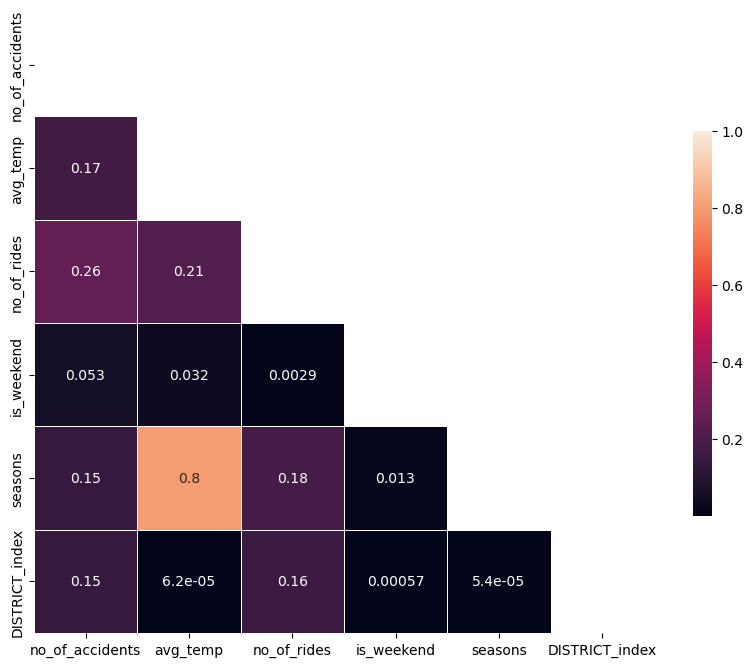

In [243]:
corr = np.abs(accidents_final_dataset.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [249]:
top_routes_per_day_start = pd.read_csv("top_routes_per_day_start.csv")

In [251]:
top_routes_per_day_start.head(60)

,Unnamed: 0,started_at_day,start_station_name_,ride_count_casual,ride_count_member,average_time_casual,average_time_member,total_rides
0,1263,Friday,Streeter Dr & Grand Ave,6625,2206,46.903094,22.271532,8831
1,263,Friday,DuSable Lake Shore Dr & Monroe St,4121,1209,58.168891,23.156328,5330
2,561,Friday,Michigan Ave & Oak St,3341,1927,38.162826,21.200830,5268
3,166,Friday,Clark St & Elm St,1601,3641,28.376640,11.865696,5242
4,439,Friday,Kingsbury St & Kinzie St,1265,3725,21.421344,9.700671,4990
5,1316,Friday,Wells St & Concord Ln,1804,3047,18.682373,12.387266,4851
6,264,Friday,DuSable Lake Shore Dr & North Blvd,2637,1760,38.577171,17.925568,4397
7,1317,Friday,Wells St & Elm St,1465,2907,17.349488,11.256622,4372
8,65,Friday,Broadway & Barry Ave,1465,2697,19.900341,13.085280,4162
9,567,Friday,Millennium Park,2787,1349,51.621816,21.848036,4136
